# Business Context:
One of leading electricity Distribution Company would like to understand demand for electricity for
the next 1-2 years to manage the production of electricity and managing the vendors for the same. It
is one of the important exercises to getting accurate estimation of demand so that they can procure
or produce the electricity as per the demand.

### Modeling Process

1 -> Data Preparation:
Renaming Columns, Setting Date column as index

2 -> Data Analysis:
We will do exploratory data analysis and plot graphs to figure out any trends in the data as well as other insights

3 -> Train Test Split: 
1st we will try different models with model validation using the split, once we get the model after hyper parameter tuning, we will use that model for further forecasting the demand for next 2 years

4 -> Model Selection and validation:
We will try various ETS and ARIMA Models with hyper-parameter tuning to figure out the best model that is able to predict better. We will use Mean Absolute Error, Mean Absolute Percentage Error and Mean Squared Error as Model Evaluation Metrics.

5 -> Forecasting:
Once we get the best hyperparameter tuned model, we will use it to forecase demand of electricity for the next 2 years

In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing Dataset
df = pd.read_csv('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/ML/13. Capstone Case Study - Demand Estimation/Electricity Consumption.csv', index_col='DATE', parse_dates=True)
df

,Electricty_Consumption_in_TW
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


In [3]:
## renaming column
df.columns =['consumption']
df

,consumption
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107
...,...
2019-05-01,97.5860
2019-06-01,110.8580
2019-07-01,122.1014


## Analysing the Data

In [4]:
## Making month and year columns

df['month'] = df.index.month
df['year'] = df.index.year
df

,consumption,month,year
DATE,,,
1973-01-01,35.9728,1,1973
1973-02-01,36.1334,2,1973
1973-03-01,35.0625,3,1973
1973-04-01,33.8416,4,1973
1973-05-01,33.5107,5,1973
...,...,...,...
2019-05-01,97.5860,5,2019
2019-06-01,110.8580,6,2019
2019-07-01,122.1014,7,2019


In [5]:
## Calculating Average Monthwise Energy Consumption
monthwise_avg_con = df.groupby('month')['consumption'].mean()
monthwise_avg_con

month
1     80.139306
2     75.548851
3     71.955721
4     67.831530
5     70.614802
6     79.670877
7     87.286079
8     87.939564
9     80.021815
10    71.481607
11    70.524457
12    76.930200
Name: consumption, dtype: float64

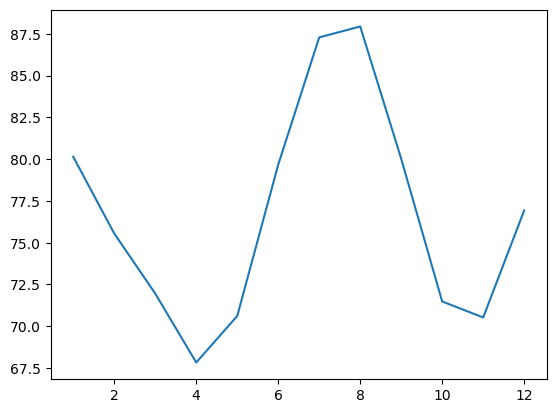

In [6]:
## Plotting Average Monthwise Energy Consumption
plt.plot(monthwise_avg_con)

### As we can see from above graph, there is peak consumption during the months of June, July, Aug and Sept

In [7]:
## Calculating Average Year Wise Energy Consumption
yearwise_avg_con = df.groupby('year')['consumption'].mean()
yearwise_avg_con

year
1973     37.024525
1974     40.501192
1975     40.803575
1976     42.811867
1977     45.649208
1978     48.819858
1979     50.328200
1980     51.335092
1981     52.163267
1982     53.497967
1983     52.165483
1984     53.659667
1985     56.801958
1986     59.127225
1987     60.381742
1988     63.322433
1989     67.152375
1990     69.193317
1991     71.238042
1992     72.967175
1993     72.650600
1994     75.068850
1995     76.773375
1996     79.633133
1997     81.609533
1998     81.710767
1999     85.210400
2000     87.845358
2001     90.351850
2002     90.161742
2003     92.778633
2004     94.519875
2005     96.428833
2006     99.153450
2007     99.548108
2008    102.090158
2009    101.396150
2010     98.361267
2011    102.319792
2012    101.858108
2013    100.000000
2014    100.999667
2015    102.023608
2016    101.880742
2017    101.831392
2018    100.202342
2019    106.027433
Name: consumption, dtype: float64

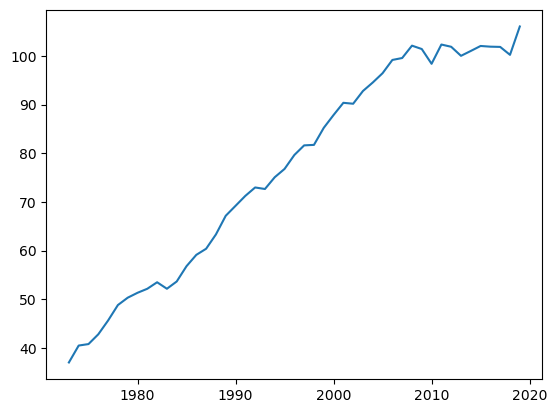

In [8]:
## Plotting Average Year Wise Energy Consumption
plt.plot(yearwise_avg_con)

### The above graph shows that there is steep increase in energy consumption year on year

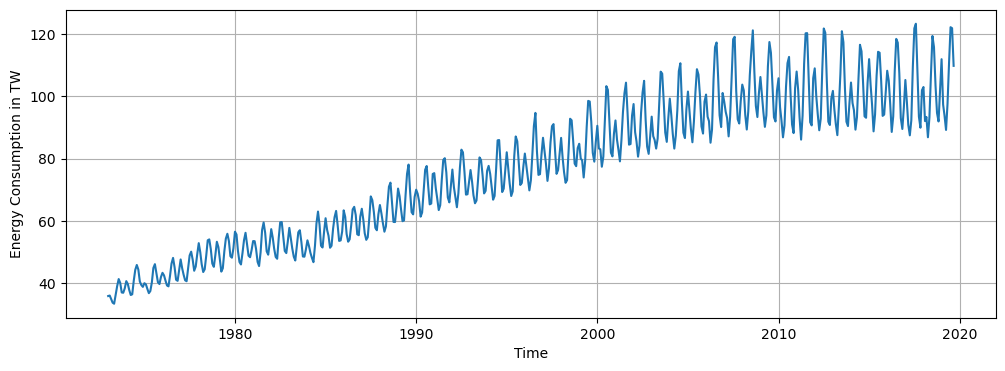

In [101]:
## Plotting Month wise energy consumption graph from Jan 1973 to Dec 2019

plt.figure(figsize=(12,4))
plt.plot(df['consumption'])
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.show()

### We can see from the above graph that there is trend and Seasonality present in the data

In [10]:
## Performing AD Fuller Test to check the stationarity of the data

In [11]:
from statsmodels.tsa.stattools import adfuller

In [21]:
## For AD Fuller Test, we consider the following:
# H0: Data is not stationary (Null Hypothesis)
# Ha: Data is Stationary (Alternate Hypothesis)

adfuller(df['consumption'])

(-1.7405933729832554,
 0.41032816044686227,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

### Since p-value is more than 0.05, we fail to reject the Null Hypothesis(H0). So we conclude that the data is not stationary

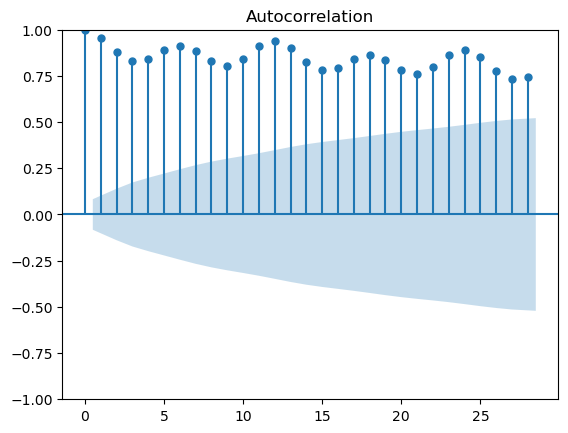

In [26]:
## Plotting ACF Plot

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['consumption'])
plt.show()

### The above ACF Plot indicates that the data is not stationary as the Auto-Correlation values are not decreasing exponentially.
### Since there is heavy seasonality, we take a difference once plot ACF again

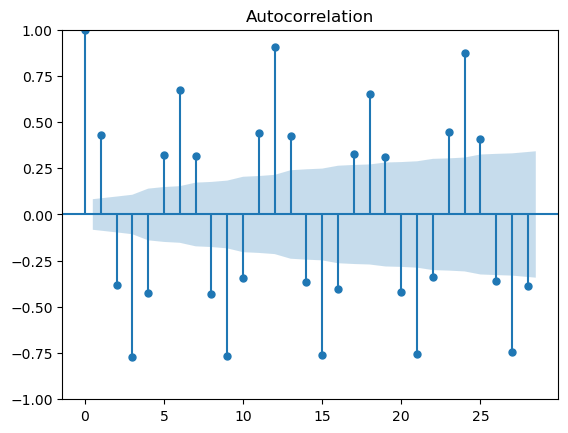

In [27]:
plot_acf(df['consumption'].diff().dropna())
plt.show()

### We can see from above ACF graph that there are significant lag at lag(1) 

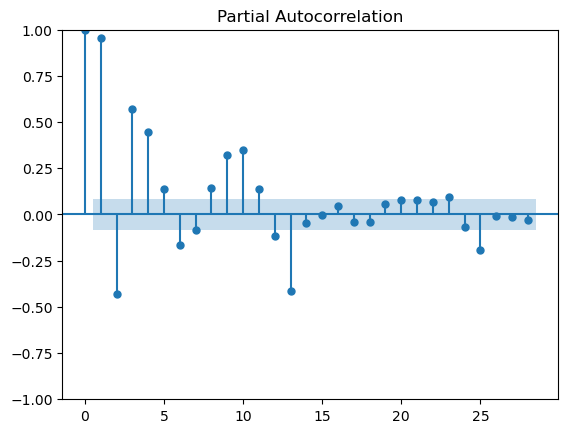

In [29]:
## Plotting PACF Plot
plot_pacf(df['consumption'])
plt.show()

### From above PACF plot we can see that there is significant lag at lag(1). 

### Making Correlation Matrix

In [113]:
## Adding Lags to original dataset

df['lag1'] = df['consumption'].shift(1)
df['lag2'] = df['consumption'].shift(2)
df['lag3'] = df['consumption'].shift(3)
df['lag4'] = df['consumption'].shift(4)
df['lag5'] = df['consumption'].shift(5)
df['lag6'] = df['consumption'].shift(6)
df

,consumption,month,year,lag1,lag2,lag3,lag4,lag5,lag6
DATE,,,,,,,,,
1973-01-01,35.9728,1,1973,NaN,NaN,NaN,NaN,NaN,NaN
1973-02-01,36.1334,2,1973,35.9728,NaN,NaN,NaN,NaN,NaN
1973-03-01,35.0625,3,1973,36.1334,35.9728,NaN,NaN,NaN,NaN
1973-04-01,33.8416,4,1973,35.0625,36.1334,35.9728,NaN,NaN,NaN
1973-05-01,33.5107,5,1973,33.8416,35.0625,36.1334,35.9728,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-05-01,97.5860,5,2019,89.1873,93.8406,97.3261,111.8520,101.9883,91.9079
2019-06-01,110.8580,6,2019,97.5860,89.1873,93.8406,97.3261,111.8520,101.9883
2019-07-01,122.1014,7,2019,110.8580,97.5860,89.1873,93.8406,97.3261,111.8520


In [114]:
## Correlation Matrix

corr_mat = df[['consumption','lag1','lag2','lag3','lag4','lag5','lag6']].dropna().corr()
corr_mat

,consumption,lag1,lag2,lag3,lag4,lag5,lag6
consumption,1.000000,0.959842,0.885373,0.841647,0.859806,0.912512,0.939857
lag1,0.959842,1.000000,0.960125,0.885725,0.841970,0.860486,0.913537
lag2,0.885373,0.960125,1.000000,0.960101,0.886007,0.843259,0.862637
lag3,0.841647,0.885725,0.960101,1.000000,0.960342,0.887243,0.845490
lag4,0.859806,0.841970,0.886007,0.960342,1.000000,0.960772,0.888468
lag5,0.912512,0.860486,0.843259,0.887243,0.960772,1.000000,0.961079
lag6,0.939857,0.913537,0.862637,0.845490,0.888468,0.961079,1.000000


<Axes: >

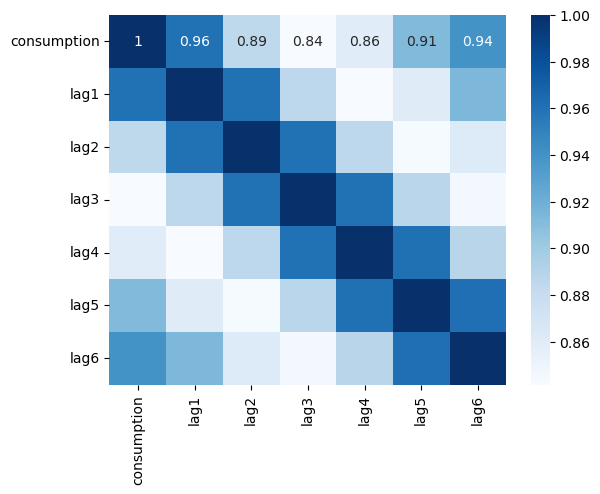

In [115]:
## Heatmap of Correlation Matrix

sns.heatmap(corr_mat, annot=True, cmap='Blues')

### From the Correlation Matrix and Heatmap we can observe that there is strong correlation between the original time series with its past values.

## Decomposition of the Time Series

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
## Using Multiplicative Model for Decomposition of Time Series 

decom = seasonal_decompose(df['consumption'], model='multiplicative')

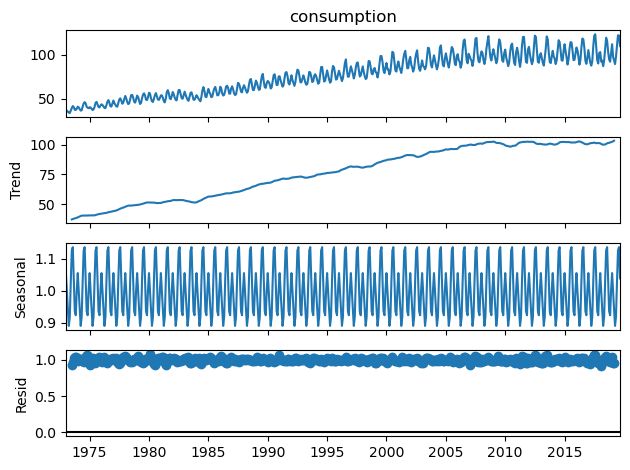

In [32]:
## Plotting the Decomposed Time Series

decom.plot()
plt.show()

### Using Seasonal Decompose Library we have decomposed the time series data with multiplicative model

## Train- Test Split for Model Validation

In [46]:
df.shape

(561, 3)

In [47]:
## We do a 80-20 train - test split which will be later used for validation on various models

X_train, X_test = df['consumption'][:449], df['consumption'][449:]
X_train, X_test

(DATE
 1973-01-01     35.9728
 1973-02-01     36.1334
 1973-03-01     35.0625
 1973-04-01     33.8416
 1973-05-01     33.5107
                 ...   
 2010-01-01    105.7413
 2010-02-01     96.4428
 2010-03-01     92.2986
 2010-04-01     86.8242
 2010-05-01     90.6389
 Name: consumption, Length: 449, dtype: float64,
 DATE
 2010-06-01    103.0377
 2010-07-01    110.6045
 2010-08-01    112.5792
 2010-09-01    100.4701
 2010-10-01     90.9259
                 ...   
 2019-05-01     97.5860
 2019-06-01    110.8580
 2019-07-01    122.1014
 2019-08-01    121.7765
 2019-09-01    109.7190
 Name: consumption, Length: 112, dtype: float64)

## ETS Models

### Implemeting Simple Exponential Smoothing for Forecasting

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing ##Importing Libraries

In [49]:
ses = SimpleExpSmoothing(X_train) ## Creating Model Object

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
model_ses = ses.fit(smoothing_level=0.2) ## Fitting the Data

/Users/abc/anaconda3/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [51]:
forecast_ses = model_ses.forecast(steps=len(X_test)) ## Setting forecast steps equal to Test Data length
forecast_ses

2010-06-01    95.415511
2010-07-01    95.415511
2010-08-01    95.415511
2010-09-01    95.415511
2010-10-01    95.415511
                ...    
2019-05-01    95.415511
2019-06-01    95.415511
2019-07-01    95.415511
2019-08-01    95.415511
2019-09-01    95.415511
Freq: MS, Length: 112, dtype: float64

In [52]:
## Importing Libraries for evaluation metrics

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [53]:
## Evaluating the Model Performance

mae = mean_absolute_error(forecast_ses, X_test)
mape = mean_absolute_percentage_error(forecast_ses, X_test)
mse = mean_squared_error(forecast_ses, X_test)

print(f'Mean Absolute Error for Simple Exponential Smooting Model is {mae}')
print(f'Mean Absolute Percentage Error for Simple Exponential Smooting Model is {mape}')
print(f'Mean Squared Error for Simple Exponential Smooting Model is {mse}')

Mean Absolute Error for Simple Exponential Smooting Model is 9.27480140739998
Mean Absolute Percentage Error for Simple Exponential Smooting Model is 0.0972043357532875
Mean Squared Error for Simple Exponential Smooting Model is 142.31158334266374


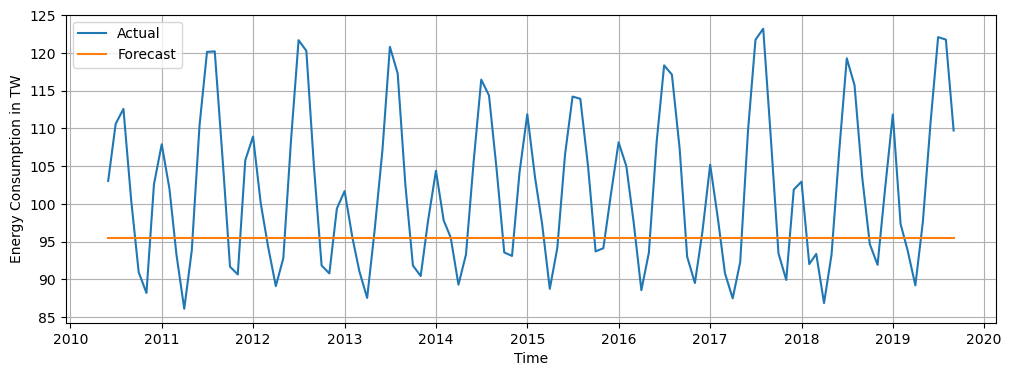

In [54]:
## Plotting Test Vs Forecast Graphs for Simple Exponential Smoothing Model

plt.figure(figsize=(12,4))
plt.plot(X_test, label='Actual')
plt.plot(forecast_ses, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

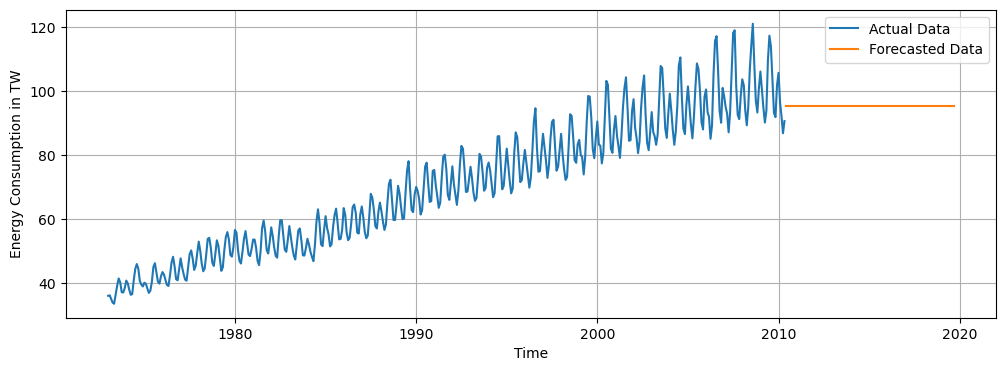

In [55]:
## Plotting Train Data along with Forecasted Data

plt.figure(figsize=(12,4))
plt.plot(X_train, label='Actual Data')
plt.plot(forecast_ses, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

### From above plot we can conclude that Simple Exponential Smoothing Model is not able to predict as it does not capture trend and seasonality of data

### Next we implement the Double Exponential Smoothing

In [56]:
des = ExponentialSmoothing(X_train, trend='mul') ## Creating Model Object

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [57]:
model_des = des.fit(smoothing_level=0.3, smoothing_slope=0.1) ## Setting alpha=0.3 and beta = 0.1

In [58]:
## Forecasting using DES Model with steps equal to length of Test Data so we can evaluate the model

forecast_des = model_des.forecast(steps=len(X_test))
forecast_des

2010-06-01    91.963397
2010-07-01    91.234092
2010-08-01    90.510570
2010-09-01    89.792786
2010-10-01    89.080694
                ...    
2019-05-01    39.230583
2019-06-01    38.919469
2019-07-01    38.610822
2019-08-01    38.304624
2019-09-01    38.000853
Freq: MS, Length: 112, dtype: float64

In [59]:
## Evaluating the Model Performance

mae_des = mean_absolute_error(forecast_des, X_test)
mape_des = mean_absolute_percentage_error(forecast_des, X_test)
mse_des = mean_squared_error(forecast_des, X_test)

print(f'Mean Absolute Error for Double Exponential Smooting Model is {mae_des}')
print(f'Mean Absolute Percentage Error for Double Exponential Smooting Model is {mape_des}')
print(f'Mean Squared Error for Double Exponential Smooting Model is {mse_des}')

Mean Absolute Error for Double Exponential Smooting Model is 40.65973156177317
Mean Absolute Percentage Error for Double Exponential Smooting Model is 0.7815402808602645
Mean Squared Error for Double Exponential Smooting Model is 2011.9237418948562


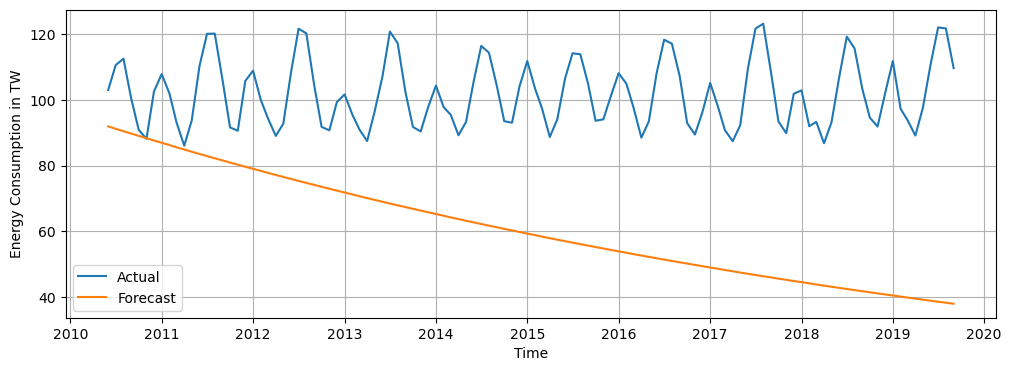

In [60]:
## Plotting Test Vs Forecast Graphs for DES Model

plt.figure(figsize=(12,4))
plt.plot(X_test, label='Actual')
plt.plot(forecast_des, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

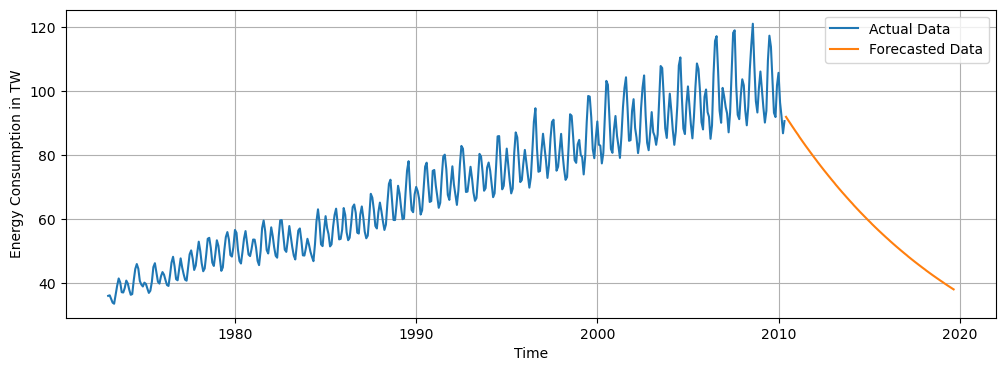

In [61]:
## Plotting Train Data along with Forecasted Data

plt.figure(figsize=(12,4))
plt.plot(X_train, label='Actual Data')
plt.plot(forecast_des, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

### From above plot we can conclude that Double Exponential Smoothing Model is not able to forecast

### Next we implement the Triple Exponential Smoothing

In [62]:
## Creating TES Model with multiplicative Trend and Seasonality and Seasonal Period of 12

tes = ExponentialSmoothing(X_train, trend='mul', seasonal='mul', seasonal_periods=12)

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
## Setting alpha=0.2, beta=0.2 and gamma=0.3 

model_tes = tes.fit(smoothing_level=0.2, smoothing_slope=0.2, smoothing_seasonal=0.3)

In [64]:
## Forecasting using TES Model with steps equal to length of Test Data so we can evaluate the model

forecast_tes = model_tes.forecast(steps=len(X_test))
forecast_tes

2010-06-01    104.715563
2010-07-01    112.994477
2010-08-01    113.319650
2010-09-01    101.221561
2010-10-01     90.874365
                 ...    
2019-05-01     65.510171
2019-06-01     74.616213
2019-07-01     80.515443
2019-08-01     80.747148
2019-09-01     72.126523
Freq: MS, Length: 112, dtype: float64

In [65]:
## Evaluating the Model Performance

mae_tes = mean_absolute_error(forecast_tes, X_test)
mape_tes = mean_absolute_percentage_error(forecast_tes, X_test)
mse_tes = mean_squared_error(forecast_tes, X_test)

print(f'Mean Absolute Error for Triple Exponential Smooting Model is {mae_tes}')
print(f'Mean Absolute Percentage Error for Triple Exponential Smooting Model is {mape_tes}')
print(f'Mean Squared Error for Triple Exponential Smooting Model is {mse_tes}')

Mean Absolute Error for Triple Exponential Smooting Model is 18.329458023295015
Mean Absolute Percentage Error for Triple Exponential Smooting Model is 0.23176311038172445
Mean Squared Error for Triple Exponential Smooting Model is 428.7397907367983


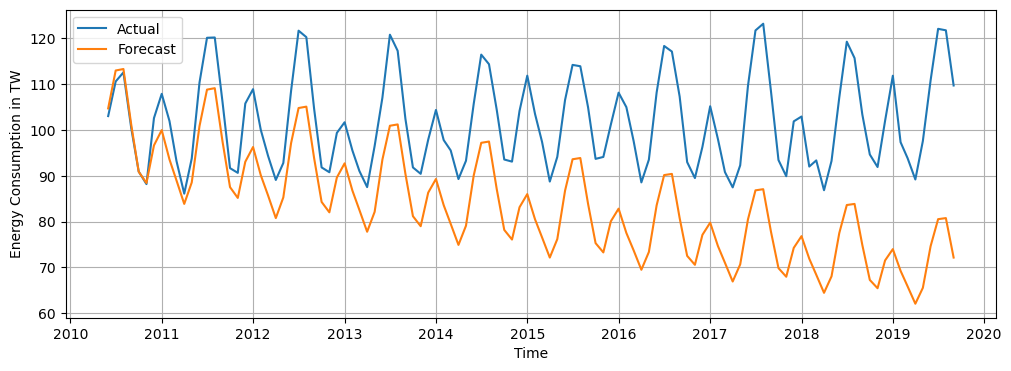

In [66]:
## Plotting Test Vs Forecast Graphs for TES Model

plt.figure(figsize=(12,4))
plt.plot(X_test, label='Actual')
plt.plot(forecast_tes, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

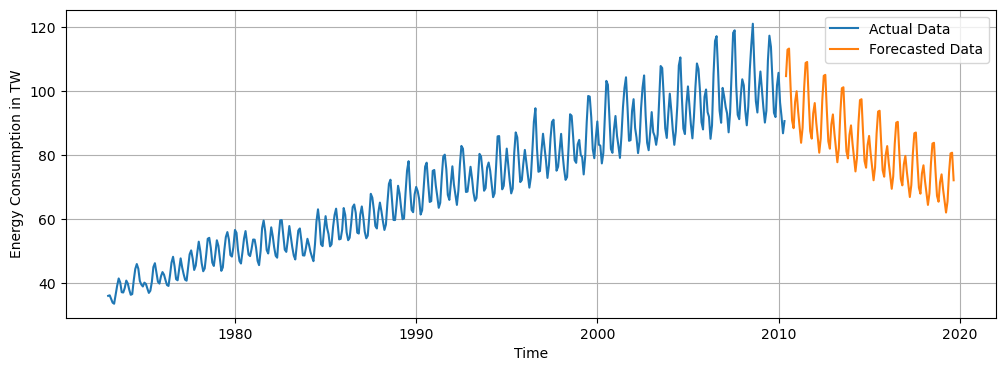

In [67]:
## Plotting Train Data along with Forecasted Data

plt.figure(figsize=(12,4))
plt.plot(X_train, label='Actual Data')
plt.plot(forecast_tes, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

In [68]:
## We tune the TES Model hyperparamters with a Grid Search Method

alpha_list = [0.2, 0.3, 0.4]
beta_list = [0.2, 0.3, 0.4]
gamma_list = [0.2, 0.3, 0.4]

mae_list, al_be_ga_list = [],[]
for a in alpha_list:
    for b in beta_list:
        for g in gamma_list:
            abg = (a, b, g)
            model_tes = tes.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
            forecast_tes = model_tes.forecast(steps=len(X_test))
            mae = mean_absolute_error(forecast_tes, X_test)
            mae_list.append(mae)
            al_be_ga_list.append(abg)


In [69]:
## Saving the Grid Search Metrics in a DataFrame and find the best hyperparameter combination with lease Error.

result = pd.DataFrame({
    'ABG Values':al_be_ga_list,
    'MAE':mae_list
})
result = result.sort_values(by='MAE')
result

,ABG Values,MAE
8,"(0.2, 0.4, 0.4)",12.960520
5,"(0.2, 0.3, 0.4)",16.239390
2,"(0.2, 0.2, 0.4)",16.833583
7,"(0.2, 0.4, 0.3)",17.644160
1,"(0.2, 0.2, 0.3)",18.329458
11,"(0.3, 0.2, 0.4)",18.715201
4,"(0.2, 0.3, 0.3)",18.727561
0,"(0.2, 0.2, 0.2)",20.305998
10,"(0.3, 0.2, 0.3)",20.352696
6,"(0.2, 0.4, 0.2)",21.612834


In [70]:
##From Hyper Parameter Tuning we can conclude that Best Values of Hyper parameters are alpha = 0.2, beta = 0.4, gamma = 0.4
## Using the Best Hyper parameters for forecasting

model_tes = tes.fit(smoothing_level=0.2, smoothing_slope=0.4, smoothing_seasonal=0.4)
forecast_tes = model_tes.forecast(steps=len(X_test))

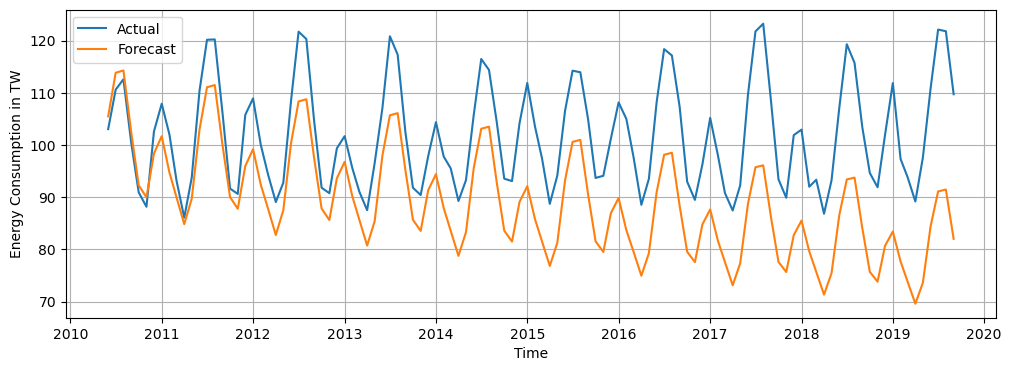

In [71]:
## Plotting Test Vs Forecast Graphs for Hyperparamter tuned TES Model

plt.figure(figsize=(12,4))
plt.plot(X_test, label='Actual')
plt.plot(forecast_tes, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

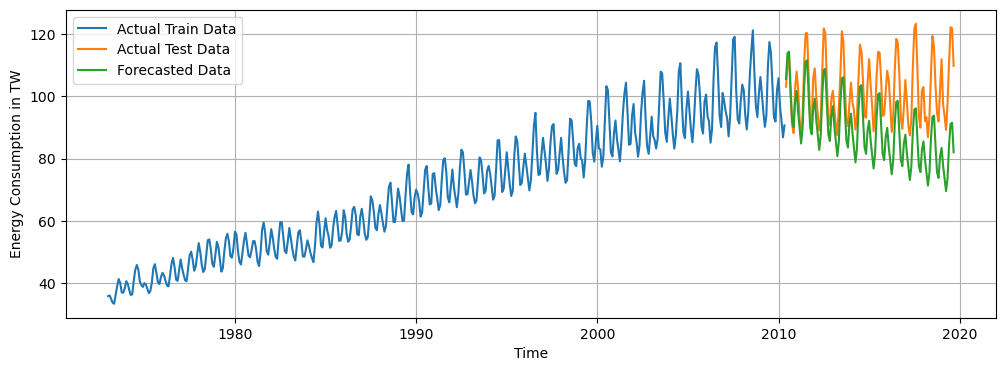

In [72]:
## Plotting Train Data along with Test Data and Forecasted Data

plt.figure(figsize=(12,4))
plt.plot(X_train, label='Actual Train Data')
plt.plot(X_test, label='Actual Test Data')
plt.plot(forecast_tes, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

### Triple Exponential Smoothing Model is also not able to predict as expected and not able to capture the trend of the data. So we move to ARIMA Models

## Implementing ARIMA Model for forecasting

In [73]:
## Importing ARIMA Model Library

from statsmodels.tsa.arima.model import ARIMA

In [74]:
## Creating Model, Fitting Data and Forecasting
# We use p,d,q values as 1,1,1 initially with steps for forecasting equal to length of Test Data

model_arima = ARIMA(endog=X_train, order=(1,1,1))
arima_fit = model_arima.fit()
forecast_arima = arima_fit.forecast(steps=len(X_test))

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [75]:
## Evaluating the Model Performance

mae_arima = mean_absolute_error(forecast_arima, X_test)
mape_arima = mean_absolute_percentage_error(forecast_arima, X_test)
mse_arima = mean_squared_error(forecast_arima, X_test)

print(f'Mean Absolute Error for ARIMA Model is {mae_arima}')
print(f'Mean Absolute Percentage Error for ARIMA Model is {mape_arima}')
print(f'Mean Squared Error for ARIMA Model is {mse_arima}')

Mean Absolute Error for ARIMA Model is 8.937367096322998
Mean Absolute Percentage Error for ARIMA Model is 0.09217053536632565
Mean Squared Error for ARIMA Model is 125.12905710699377


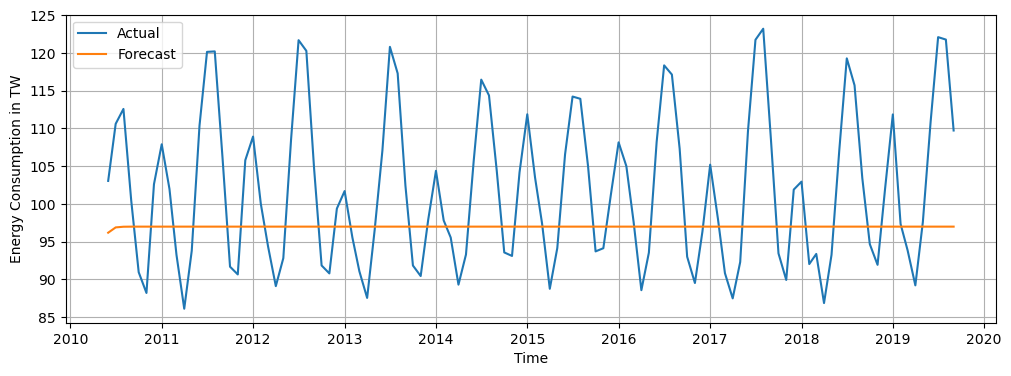

In [76]:
## Plotting Test Data vs Forecasted Data Graphs

plt.figure(figsize=(12,4))
plt.plot(X_test, label='Actual')
plt.plot(forecast_arima, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

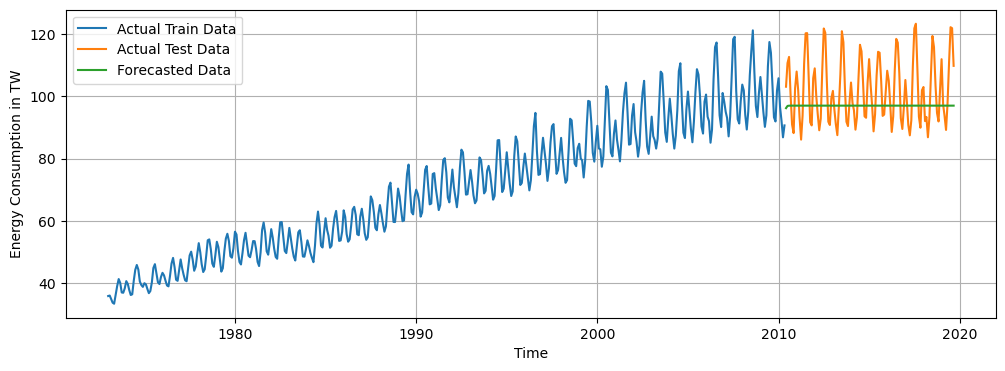

In [77]:
## Plotting Train Data along with Test Data and Forecasted Data for ARIMA Model

plt.figure(figsize=(12,4))
plt.plot(X_train, label='Actual Train Data')
plt.plot(X_test, label='Actual Test Data')
plt.plot(forecast_arima, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

In [79]:
## Hyperparameter tuning of ARIMA Model using Grid Search Method

p_range = range(0,4)
d_range = range(0,4)
q_range = range(0,4)

mae_arima_list, order_list = [],[]

for p in p_range:
    for d in d_range:
        for q in q_range:
            order = (p, d, q)
            model_arima = ARIMA(endog=X_train, order=(p,d,q)).fit()
            forecast_arima = model_arima.forecast(steps=len(X_test))
            mae_arima = mean_absolute_error(forecast_arima, X_test)
            mae_arima_list.append(mae_arima)
            order_list.append(order)

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information w

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information w

In [80]:
## Saving the Grid Search Metrics in a DataFrame and find the best hyperparameter combination with lease Error.

result = pd.DataFrame({
    'Order':order_list,
    'MAE':mae_arima_list
})
result = result.sort_values(by='MAE')
result

,Order,MAE
54,"(3, 1, 2)",5.115315
38,"(2, 1, 2)",5.172821
55,"(3, 1, 3)",5.175560
50,"(3, 0, 2)",5.352308
39,"(2, 1, 3)",5.567010
...,...,...
14,"(0, 3, 2)",452.020048
60,"(3, 3, 0)",5084.566442
44,"(2, 3, 0)",16261.825527
28,"(1, 3, 0)",17656.312950


In [81]:
##From Hyper Parameter Tuning we can conclude that Best Values of Hyper parameters are p = 3, d = 1, q = 2
## Using the Best Hyper parameters for forecasting

model_arima = ARIMA(endog=X_train, order=(3,1,2)).fit()
forecast_arima = model_arima.forecast(steps=len(X_test))

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


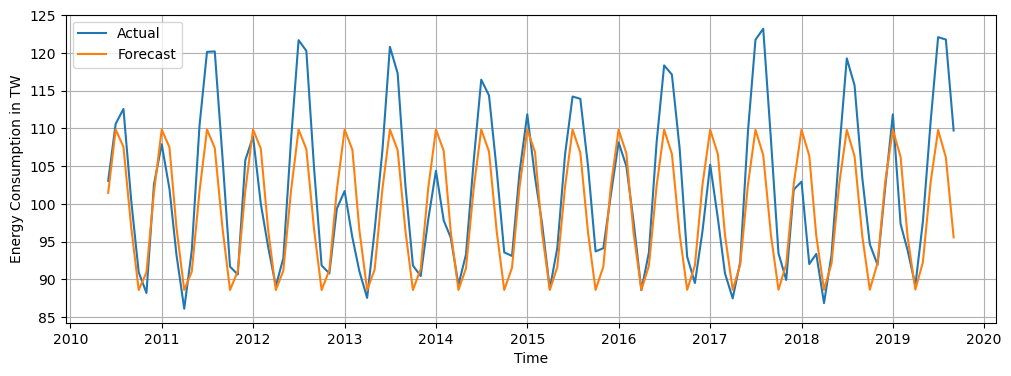

In [82]:
## Plotting Test Vs Forecast Graphs for Hyperparamter tuned ARIMA Model

plt.figure(figsize=(12,4))
plt.plot(X_test, label='Actual')
plt.plot(forecast_arima, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

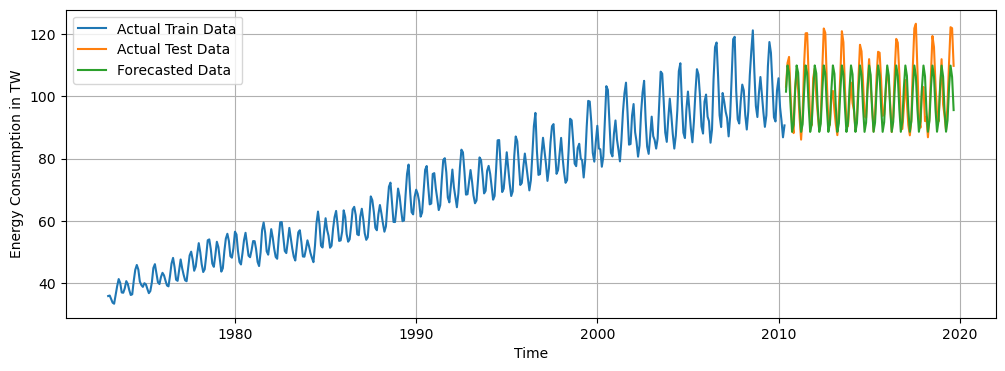

In [83]:
## Plotting Train Data along with Test Data and Forecasted Data

plt.figure(figsize=(12,4))
plt.plot(X_train, label='Actual Train Data')
plt.plot(X_test, label='Actual Test Data')
plt.plot(forecast_arima, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

### With Hyper Parameter Tuning for ARIMA Model we are able to get decent predictions with low Mean Absolute Error

## Implementing SARIMA Model 

In [84]:
## Importing Library for SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [86]:
## Creating Model and Fitting Data
# We use p,d,q values as 1,1,1 and P,D,Q,T values as 1,1,1,12 initially 

model_sarima = SARIMAX(endog=X_train, order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.93121D+00    |proj g|=  1.55059D-01

At iterate    5    f=  1.85549D+00    |proj g|=  2.99933D-02

At iterate   10    f=  1.85169D+00    |proj g|=  1.00332D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     16      1     0     0   1.411D-05   1.852D+00
  F =   1.8516868355682359     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [87]:
## Forecasting for steps equal to length of Test Data for model evaluation

forecast_sarima = model_sarima.forecast(steps=len(X_test))
forecast_sarima

2010-06-01    105.311223
2010-07-01    114.987721
2010-08-01    116.251027
2010-09-01    104.469157
2010-10-01     94.376439
                 ...    
2019-05-01     98.051909
2019-06-01    111.812150
2019-07-01    120.918276
2019-08-01    121.783808
2019-09-01    109.853272
Freq: MS, Name: predicted_mean, Length: 112, dtype: float64

In [88]:
## Evaluating the Model Performance

mae_sarima = mean_absolute_error(forecast_sarima, X_test)
mape_sarima = mean_absolute_percentage_error(forecast_sarima, X_test)
mse_sarima = mean_squared_error(forecast_sarima, X_test)

print(f'Mean Absolute Error for SARIMA Model is {mae_sarima}')
print(f'Mean Absolute Percentage Error for SARIMA Model is {mape_sarima}')
print(f'Mean Squared Error for SARIMA Model is {mse_sarima}')

Mean Absolute Error for SARIMA Model is 3.0710392020773916
Mean Absolute Percentage Error for SARIMA Model is 0.029883180101566906
Mean Squared Error for SARIMA Model is 13.035384380314245


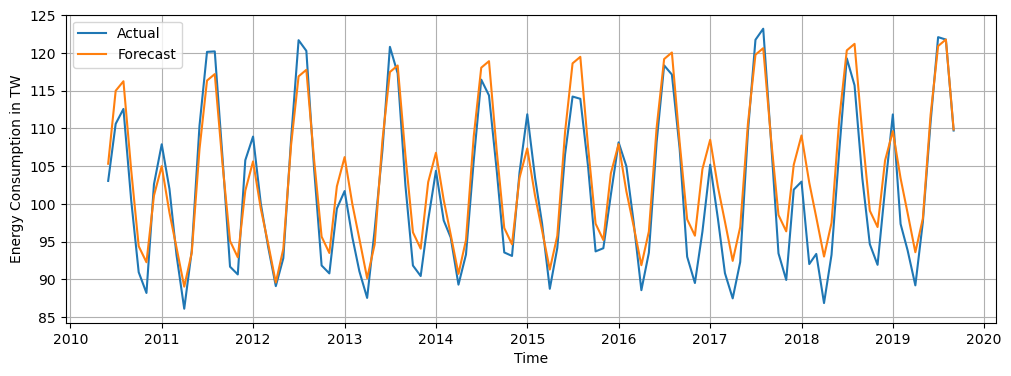

In [89]:
## Plotting Test Data vs Forecasted Data Graphs for SARIMA Model

plt.figure(figsize=(12,4))
plt.plot(X_test, label='Actual')
plt.plot(forecast_sarima, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

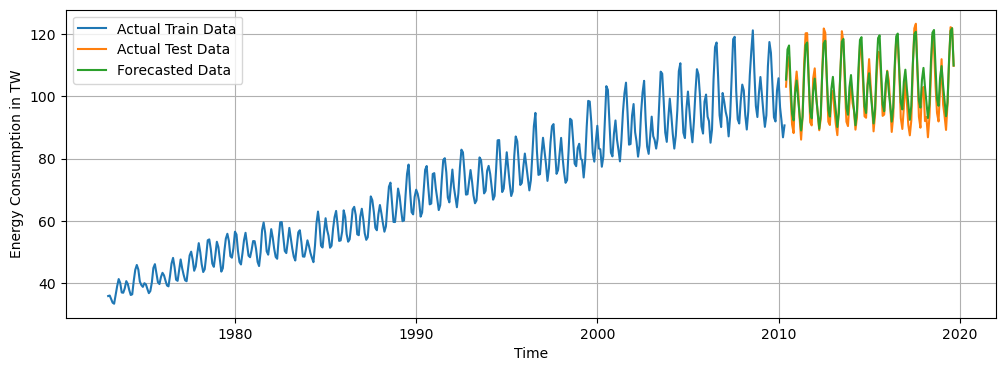

In [90]:
## Plotting Train Data along with Test Data and Forecasted Data for SARIMA Model

plt.figure(figsize=(12,4))
plt.plot(X_train, label='Actual Train Data')
plt.plot(X_test, label='Actual Test Data')
plt.plot(forecast_sarima, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

In [92]:
## Hyperparameter tuning of SARIMA Model using Grid Search Method

p_range = range(0,3)
d_range = range(0,3)
q_range = range(0,3)
P_range = range(0,3)
D_range = range(0,3)
Q_range = range(0,3)
T = 12

mae_sarima_list, config_list = [],[]

for p in p_range:
    for d in d_range:
        for q in q_range:
            for P in P_range:
                for D in D_range:
                    for Q in Q_range:
                        config = (p, d, q, P, D, Q)
                        model_sarima = SARIMAX(endog=X_train, order=(p,d,q), seasonal_order=(P,D,Q,T),
                                              enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
                        forecast_sarima = model_sarima.forecast(steps=len(X_test))
                        mae_sarima = mean_absolute_error(forecast_sarima, X_test)
                        mae_sarima_list.append(mae_sarima)
                        config_list.append(config)

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information w

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to conve

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No freq

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information w

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information w

In [93]:
## Saving the Grid Search Metrics in a DataFrame and find the best hyperparameter combination with lease Error.

result = pd.DataFrame({
    'Config':config_list,
    'MAE':mae_sarima_list
})
result = result.sort_values(by='MAE')
result

,Config,MAE
350,"(1, 1, 0, 2, 2, 2)",2.149971
134,"(0, 1, 1, 2, 2, 2)",2.163722
107,"(0, 1, 0, 2, 2, 2)",2.213085
266,"(1, 0, 0, 2, 1, 2)",2.253000
509,"(2, 0, 0, 2, 1, 2)",2.260783
...,...,...
189,"(0, 2, 1, 0, 0, 0)",417.931229
663,"(2, 2, 0, 1, 2, 0)",427.782131
177,"(0, 2, 0, 1, 2, 0)",501.051454
411,"(1, 2, 0, 0, 2, 0)",825.012399


In [94]:
## From Hyper Parameter Tuning we can conclude that Best Values of are p = 1, d = 1, q = 0, P = 2, D = 2, Q = 2
# Using the Best Hyper parameters for forecasting

model_sarima = SARIMAX(endog=X_train, order=(1,1,0), seasonal_order=(2,2,2,12),
                        enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
forecast_sarima = model_sarima.forecast(steps=len(X_test))

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


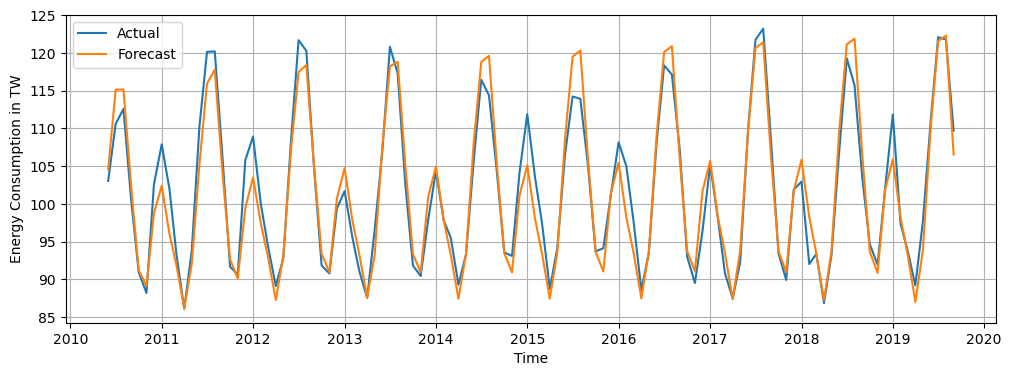

In [96]:
## Plotting Test Data vs Forecasted Data Graphs for Hyperparameter Tuned SARIMA Model

plt.figure(figsize=(12,4))
plt.plot(X_test, label='Actual')
plt.plot(forecast_sarima, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

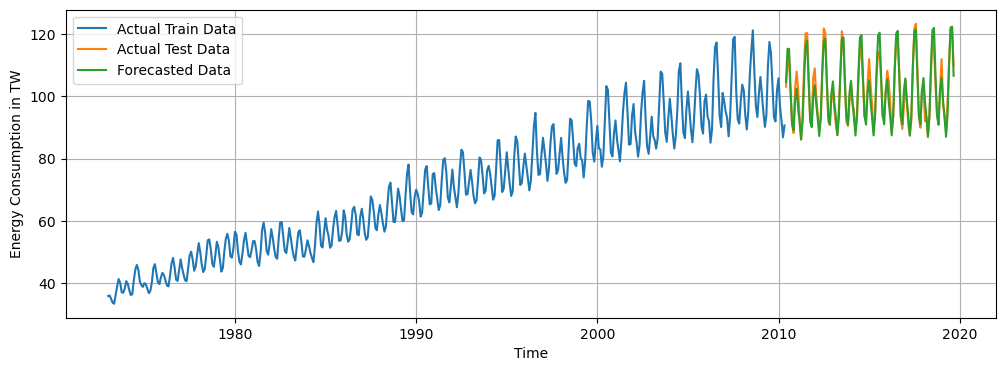

In [97]:
## Plotting Train Data along with Test Data and Forecasted Data for Huperparameter Tuned SARIMA Model

plt.figure(figsize=(12,4))
plt.plot(X_train, label='Actual Train Data')
plt.plot(X_test, label='Actual Test Data')
plt.plot(forecast_sarima, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()

### From all the above models we have tried with different hyperparameter combinations we can conclude that SARIMA Model with hyper-parameters p=1, d=1, q=0, P=2, Q=2 & D=2 is the best model for forecasting given the data

## Now, we do demand estimation for next 2 years by forecasting Electricity consumption using our hyperparameter tuned SARIMA Model

In [98]:
model_sarima = SARIMAX(endog=df['consumption'], order=(1,1,0), seasonal_order=(2,2,2,12),
                        enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
forecast_sarima = model_sarima.forecast(steps=24)

/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/abc/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [99]:
## Forecast for next 2 years
forecast_sarima

2019-10-01     96.947904
2019-11-01     95.010246
2019-12-01    105.687867
2020-01-01    112.214683
2020-02-01    103.709780
2020-03-01     97.850724
2020-04-01     91.497046
2020-05-01     98.493108
2020-06-01    114.233459
2020-07-01    125.882760
2020-08-01    125.672816
2020-09-01    111.209968
2020-10-01     97.301510
2020-11-01     95.144724
2020-12-01    106.389915
2021-01-01    111.384328
2021-02-01    103.481806
2021-03-01     98.306782
2021-04-01     91.475099
2021-05-01     98.285859
2021-06-01    114.516973
2021-07-01    126.535941
2021-08-01    125.717721
2021-09-01    110.832167
Freq: MS, Name: predicted_mean, dtype: float64

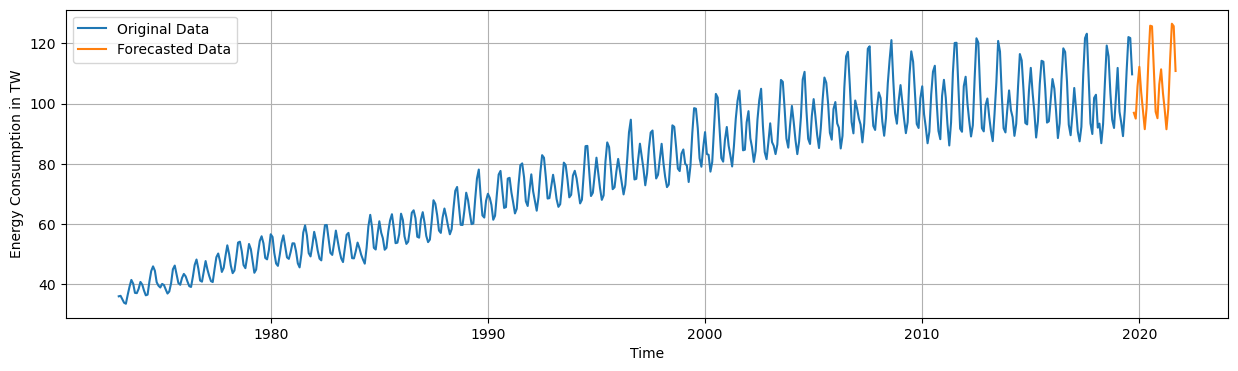

In [100]:
## Plotting the Forecasted Values along with original data

plt.figure(figsize = (15,4))
plt.plot(df['consumption'], label='Original Data')
plt.plot(forecast_sarima, label='Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Energy Consumption in TW')
plt.grid()
plt.legend()
plt.show()